    Country       Academic level    Value
0  Viet Nam         Không đi học    7.642
1  Viet Nam              Mầm non   38.120
2  Viet Nam             Tiểu học  131.598
3  Viet Nam      Trung học cơ sở  173.567
4  Viet Nam  Trung học phổ thông  232.432
5  Viet Nam       Chứng chỉ nghề   30.377
6  Viet Nam             Cao đẳng   56.368
7  Viet Nam      Cử nhân đại học  179.633
8  Viet Nam              Thạc sỹ    2.034
Trung bình: 94.64122222222221
Độ lệch chuẩn: 85.68789528395737


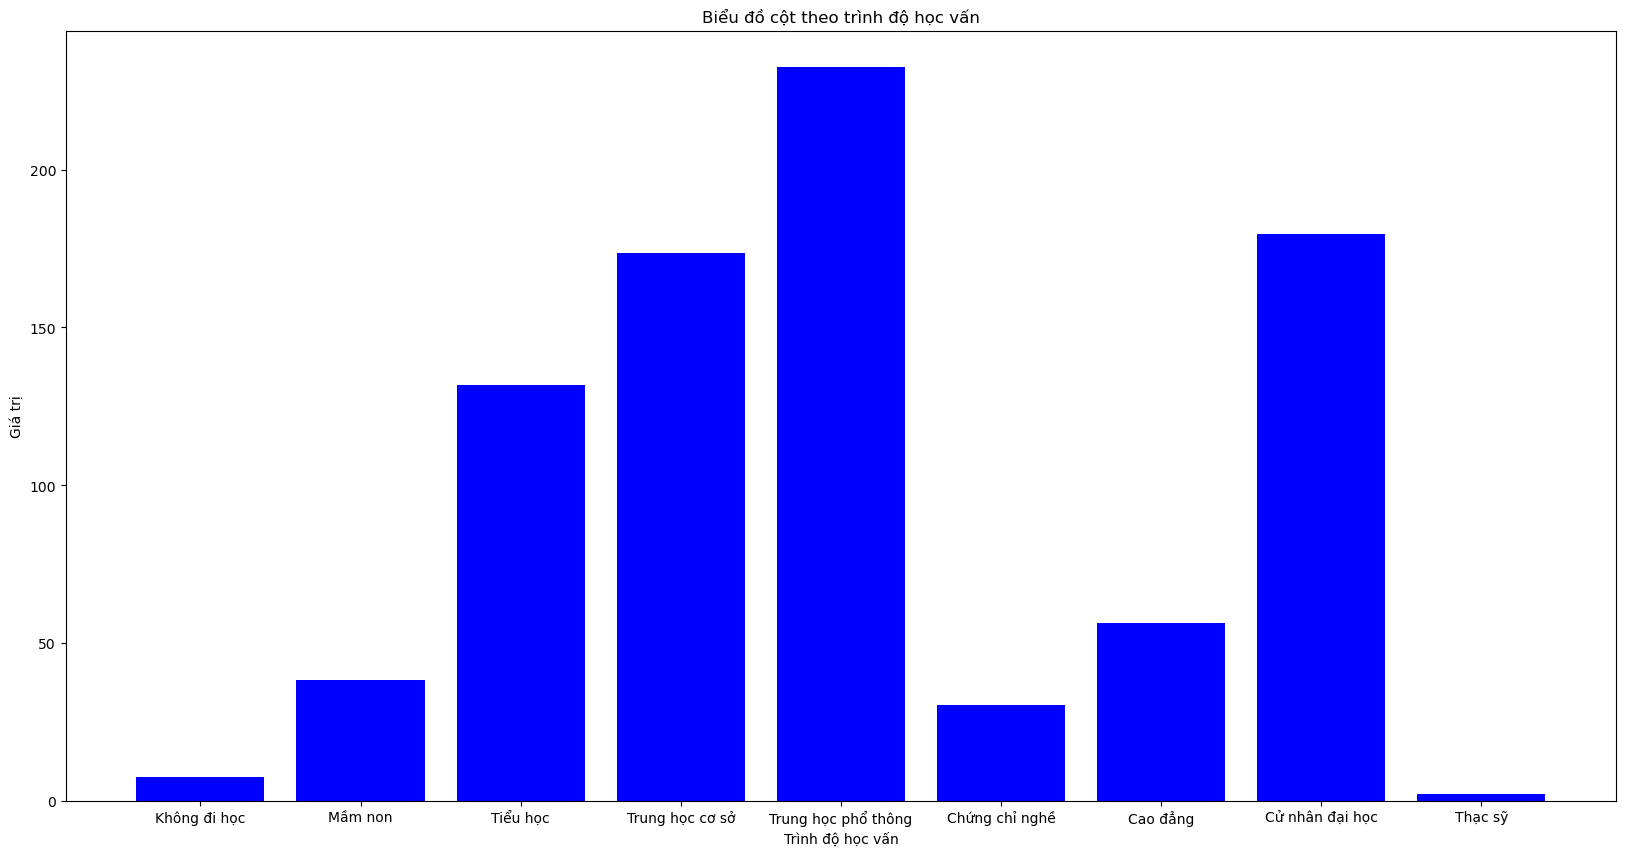

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đường dẫn đến file CSV
file_path = 'TNtheoTrinhDoHV.csv'

# Đọc file CSV và lưu vào một DataFrame
df = pd.read_csv(file_path)

df = df.rename(columns={'ref_area.label': 'Country', 'sex.label': 'Sex',  'obs_value': 'Value','classif2.label':'Academic level'})
col = ['indicator.label', 'source.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label' ]
df.drop(columns=col, inplace=True)
df = df[(df['Sex'] == 'Sex: Total')]
col = ['Sex', 'classif1.label','classif3.label' ]
df.drop(columns=col, inplace=True)
mapping_dict = {
    'Education (ISCED-11): X. No schooling': 'Không đi học',
    'Education (ISCED-11): 0. Early childhood education': 'Mầm non',
    'Education (ISCED-11): 1. Primary education': 'Tiểu học',
    'Education (ISCED-11): 2. Lower secondary education': 'Trung học cơ sở',
    'Education (ISCED-11): 3. Upper secondary education': 'Trung học phổ thông',
    'Education (ISCED-11): 4. Post-secondary non-tertiary education': 'Chứng chỉ nghề',
    'Education (ISCED-11): 5. Short-cycle tertiary education': 'Cao đẳng',
    'Education (ISCED-11): 6. Bachelor  equivalent level': 'Cử nhân đại học',
    'Education (ISCED-11): 7. Master  equivalent level': 'Thạc sỹ'
}

df.replace(mapping_dict, inplace=True)
# Hiển thị nội dung của DataFrame
print(df)
df1 = pd.DataFrame(df, columns=['Value'])
trung_binh = df1['Value'].mean()
print(f"Trung bình: {trung_binh}")
do_lech_chuan = df['Value'].std()
print(f"Độ lệch chuẩn: {do_lech_chuan}")
plt.figure(figsize=(20, 10))  # Thiết lập kích thước cho biểu đồ
plt.bar(df['Academic level'], df['Value'], color='blue')
# Vẽ biểu đồ cột
# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ cột theo trình độ học vấn')
plt.xlabel('Trình độ học vấn')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()
df.to_csv('TNtheoTDHVdaxuly.csv', encoding='utf-8', index=False, header=True)